### 온도예측 Data Set (108 지점 서울관측소)

In [1]:
## 경고 메세지 표시 안하기
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='malgun gothic')
plt.rcParams['axes.unicode_minus'] = False

In [10]:
seoul = pd.read_excel('Data/(2010-2020) weather.xlsx')

In [11]:
seoul.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,2010-01-01,108,-7.6,-12.7,-3.6
1,2010-01-02,108,-3.6,-7.4,0.2
2,2010-01-03,108,-6.8,-10.5,-3.2
3,2010-01-04,108,-5.9,-8.0,-3.4
4,2010-01-05,108,-9.9,-12.3,-7.0


In [12]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       4018 non-null   datetime64[ns]
 1   지점       4018 non-null   int64         
 2   평균기온(℃)  4018 non-null   float64       
 3   최저기온(℃)  4018 non-null   float64       
 4   최고기온(℃)  4017 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 157.1 KB


In [13]:
seoul.drop('지점', axis = 1, inplace = True)

In [14]:
seoul.head()

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
0,2010-01-01,-7.6,-12.7,-3.6
1,2010-01-02,-3.6,-7.4,0.2
2,2010-01-03,-6.8,-10.5,-3.2
3,2010-01-04,-5.9,-8.0,-3.4
4,2010-01-05,-9.9,-12.3,-7.0


In [16]:
# axis = 1 : 열을 지운다, axis = 0 : 행을 지운다 inplace=True 는 Seoul원본 수정

In [18]:
# 항목이름 수정
seoul.rename(columns={"평균기온(℃)" : "AVG", "최저기온(℃)" : "MI", "최고기온(℃)":"MX"}, inplace=True)


In [19]:
seoul.head()

,날짜,AVG,MI,MX
0,2010-01-01,-7.6,-12.7,-3.6
1,2010-01-02,-3.6,-7.4,0.2
2,2010-01-03,-6.8,-10.5,-3.2
3,2010-01-04,-5.9,-8.0,-3.4
4,2010-01-05,-9.9,-12.3,-7.0


In [20]:
seoul.rename(columns={"날짜" : "DATE"}, inplace=True)


In [21]:
seoul.head()

,DATE,AVG,MI,MX
0,2010-01-01,-7.6,-12.7,-3.6
1,2010-01-02,-3.6,-7.4,0.2
2,2010-01-03,-6.8,-10.5,-3.2
3,2010-01-04,-5.9,-8.0,-3.4
4,2010-01-05,-9.9,-12.3,-7.0


In [23]:
seoul.columns = ['날짜', '평균기온', '최저기온', '최고기온']

In [24]:
seoul.head()

,날짜,평균기온,최저기온,최고기온
0,2010-01-01,-7.6,-12.7,-3.6
1,2010-01-02,-3.6,-7.4,0.2
2,2010-01-03,-6.8,-10.5,-3.2
3,2010-01-04,-5.9,-8.0,-3.4
4,2010-01-05,-9.9,-12.3,-7.0


In [25]:
seoul.isnull().sum()

날짜      0
평균기온    0
최저기온    0
최고기온    1
dtype: int64

In [26]:
seoul.dropna(subset='최고기온', axis = 0, inplace = True)

In [27]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4017 entries, 0 to 4017
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      4017 non-null   datetime64[ns]
 1   평균기온    4017 non-null   float64       
 2   최저기온    4017 non-null   float64       
 3   최고기온    4017 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 156.9 KB


In [28]:
##최고기온 Null행 제거

In [29]:
seoul.head()

,날짜,평균기온,최저기온,최고기온
0,2010-01-01,-7.6,-12.7,-3.6
1,2010-01-02,-3.6,-7.4,0.2
2,2010-01-03,-6.8,-10.5,-3.2
3,2010-01-04,-5.9,-8.0,-3.4
4,2010-01-05,-9.9,-12.3,-7.0


In [30]:
seoul['년도'] = seoul['날짜'].dt.year
seoul['월'] = seoul['날짜'].dt.month
seoul['일'] = seoul['날짜'].dt.day
seoul.head()

,날짜,평균기온,최저기온,최고기온,년도,월,일
0,2010-01-01,-7.6,-12.7,-3.6,2010,1,1
1,2010-01-02,-3.6,-7.4,0.2,2010,1,2
2,2010-01-03,-6.8,-10.5,-3.2,2010,1,3
3,2010-01-04,-5.9,-8.0,-3.4,2010,1,4
4,2010-01-05,-9.9,-12.3,-7.0,2010,1,5


In [31]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4017 entries, 0 to 4017
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      4017 non-null   datetime64[ns]
 1   평균기온    4017 non-null   float64       
 2   최저기온    4017 non-null   float64       
 3   최고기온    4017 non-null   float64       
 4   년도      4017 non-null   int32         
 5   월       4017 non-null   int32         
 6   일       4017 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(3)
memory usage: 204.0 KB


In [35]:
seoul0815 = seoul [(seoul['월'] == 8 ) & ( seoul['일'] == 15) ]

In [36]:
seoul0815

,날짜,평균기온,최저기온,최고기온,년도,월,일
226,2010-08-15,26.6,24.6,30.2,2010,8,15
591,2011-08-15,24.5,22.9,26.9,2011,8,15
957,2012-08-15,23.7,22.4,27.1,2012,8,15
1322,2013-08-15,28.7,25.8,32.4,2013,8,15
1687,2014-08-15,24.9,20.9,29.6,2014,8,15
2052,2015-08-15,27.1,23.1,30.8,2015,8,15
2418,2016-08-15,29.1,25.8,34.0,2016,8,15
2783,2017-08-15,21.9,20.8,24.0,2017,8,15
3148,2018-08-15,31.7,28.3,38.0,2018,8,15
3513,2019-08-15,25.9,23.9,28.6,2019,8,15


In [37]:
seoul0816 = seoul[(seoul['날짜'].dt.month == 8 ) & (seoul['날짜'].dt.day == 16 )]

In [38]:
seoul0816

,날짜,평균기온,최저기온,최고기온,년도,월,일
227,2010-08-16,24.8,22.8,26.7,2010,8,16
592,2011-08-16,25.0,23.6,26.2,2011,8,16
958,2012-08-16,26.0,22.7,28.9,2012,8,16
1323,2013-08-16,28.7,26.1,31.7,2013,8,16
1688,2014-08-16,26.1,22.2,31.8,2014,8,16
2053,2015-08-16,25.8,20.7,31.2,2015,8,16
2419,2016-08-16,29.3,26.2,34.9,2016,8,16
2784,2017-08-16,23.3,20.5,26.8,2017,8,16
3149,2018-08-16,29.9,24.1,35.6,2018,8,16
3514,2019-08-16,25.9,23.0,29.5,2019,8,16


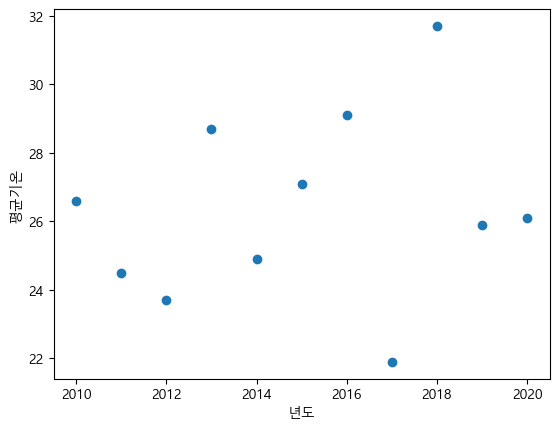

In [40]:
plt.scatter(seoul0815['년도'], seoul0815['평균기온'])
plt.xlabel('년도')
plt.ylabel('평균기온')
plt.show()

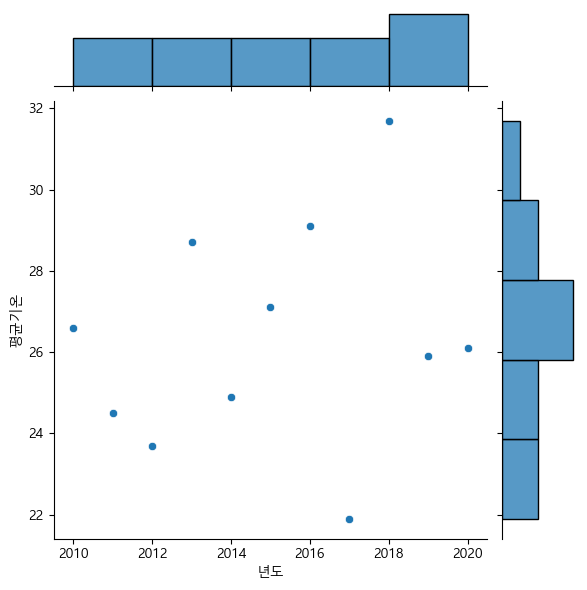

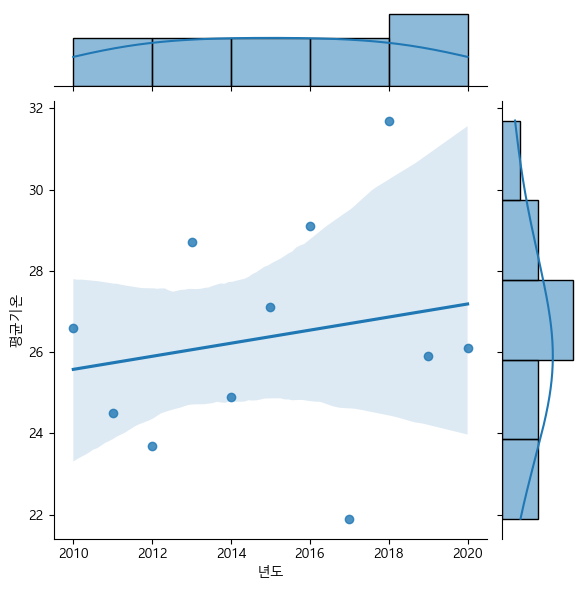

In [42]:
sns.jointplot(x='년도', y = '평균기온', data = seoul0815)
sns.jointplot(x='년도', y = '평균기온', kind = 'reg', data = seoul0815)
plt.show() ## reg 는 regression표현

In [45]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(seoul0815[['년도']], seoul0815[['평균기온']])

LinearRegression()

In [47]:
result = model.predict([[2024]]) #2024년도 8월 15일 예측
print(result)

[[27.83]]
